In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean

Ініціалізація SparkSession

In [2]:
spark = SparkSession.builder \
    .appName("Reading CSV and Data Manipulation") \
    .getOrCreate()

Завантаження CSV файлу

In [3]:
df = spark.read.csv("lab5_file.csv", header=True, inferSchema=True)

Вивід схеми даних

In [4]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



Виведення назв стовпців та їх типів

In [5]:
print("Назви стовпців та типи даних:")
df.dtypes

Назви стовпців та типи даних:


[('Name', 'string'),
 ('Author', 'string'),
 ('User Rating', 'double'),
 ('Reviews', 'int'),
 ('Price', 'int'),
 ('Year', 'int'),
 ('Genre', 'string')]

Виведення перших п'яти рядків

In [6]:
print("Перші п'ять рядків:")
df.head(5)

Перші п'ять рядків:


[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction'),
 Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052, Price=22, Year=2011, Genre='Fiction'),
 Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979, Price=15, Year=2018, Genre='Non Fiction'),
 Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424, Price=6, Year=2017, Genre='Fiction'),
 Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665, Price=12, Year=2019, Genre='Non Fiction')]

Виведення першого рядка

In [7]:
print("Перший рядок:")
df.first()

Перший рядок:


Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')

Опис датасету

In [8]:
print("Опис датасету:")
df.describe().show()

Опис датасету:
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                NULL|            NULL|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       NULL|
| stddev|                NULL|            NULL|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       NULL|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass:

Виведення списку стовпців

In [9]:
print("Список стовпців:")
df.columns

Список стовпців:


['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

Загальна кількість рядків

In [10]:
print("Загальна кількість рядків даних:", df.count())

Загальна кількість рядків даних: 550


Обчислення середніх значень кожного стовпця

In [13]:
means = df.agg(*(mean(col).alias(col) for col in df.columns)).collect()[0].asDict()

Заміна пропущених значень на середні за кожним стовпцем

In [15]:
for col in df.columns:
    mean_value = means[col]
    if mean_value is not None:
        df = df.na.fill(mean_value, [col])

Перетворення типів даних на float

In [21]:
for col in df.columns:
    df = df.withColumn(col, df[col].cast("float"))

Кількість книг у датасеті

In [22]:
print("Кількість книг у датасеті:", df.count())

Кількість книг у датасеті: 550


Зміна назв колонок

In [23]:
df = df.toDF('name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre')

Знайдення автора з найвищим рейтингом

In [24]:
print("Автор з найвищим рейтингом:")
df.filter(df.author.isNotNull()).orderBy(df.user_rating.desc()).select('author').first()

Автор з найвищим рейтингом:


Знайдення автора з найнижчим рейтингом

In [25]:
print("Автор з найнижчим рейтингом:")
df.orderBy(df.user_rating).select('author').first()

Автор з найнижчим рейтингом:


Row(author=None)

Знайдення автора з найбільшою кількістю рецензій

In [27]:
print("Автор з найбільшою кількістю рецензій:")
df.orderBy(df.reviews.desc()).select('author').first()

Автор з найбільшою кількістю рецензій:


Row(author=None)

Побудова гістограми рейтингу для 10 найкращих книг

<Axes: ylabel='Frequency'>

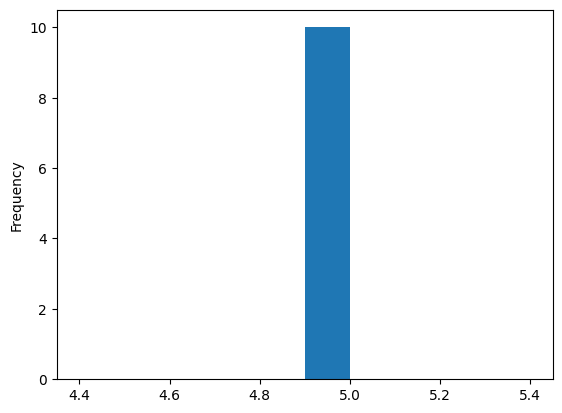

In [28]:
top_10_books = df.orderBy(df.user_rating.desc()).limit(10)
top_10_books.toPandas().user_rating.plot(kind='hist', bins=10)

Побудова матриці кореляції

In [29]:
print("Матриця кореляції:")
df.select('user_rating', 'reviews', 'price').toPandas().corr()

Матриця кореляції:


,user_rating,reviews,price
user_rating,1.000000,-0.001729,-0.133086
reviews,-0.001729,1.000000,-0.109182
price,-0.133086,-0.109182,1.000000
